# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

# Seleccion de modelo para baseline

Para la seleccion de un baseline se usaran 3 modelos para comparar su desempeño, estos seran SVC, Modelo2, Modelo3. Una vez analizados y comparados, se eleigira el modelo con un mejor desempeño, y de en base a los resultados obtenidos en este, se definiran la metrica que mejor se ajuste al problema en particular y el dese,peño minimo a obtener.

In [18]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
X = pd.read_csv('../data/processed/DTCPep_pca_pfeatures.csv')
y = pd.read_csv('../data/processed/DTCPep_y.csv')

In [3]:

print(X.shape)
print(y.shape)

(8091, 18)
(8091, 1)


# Separar datasets en train y test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =4, stratify=y_train)


# Comparar modelos usando lazypredict

In [5]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

100%|██████████| 32/32 [00:21<00:00,  1.50it/s]

[LightGBM] [Info] Number of positive: 2101, number of negative: 4371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324629 -> initscore=-0.732578
[LightGBM] [Info] Start training from score -0.732578


In [6]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelPropagation,1.00,1.00,1.00,1.00,1.00,3.12
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.03
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.20
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.76
LabelSpreading,1.00,1.00,1.00,1.00,1.00,3.49
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,2.97
XGBClassifier,1.00,1.00,1.00,1.00,0.99,0.37
BaggingClassifier,0.99,0.98,0.98,0.99,0.97,1.29
LGBMClassifier,0.94,0.92,0.92,0.94,0.86,0.14


In [7]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 32/32 [00:18<00:00,  1.72it/s]

[LightGBM] [Info] Number of positive: 2101, number of negative: 4371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324629 -> initscore=-0.732578
[LightGBM] [Info] Start training from score -0.732578


In [8]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelPropagation,1.00,1.00,1.00,1.00,1.00,2.60
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.03
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.22
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.74
LabelSpreading,1.00,1.00,1.00,1.00,1.00,3.09
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,2.88
XGBClassifier,1.00,1.00,1.00,1.00,0.99,0.21
BaggingClassifier,0.99,0.98,0.98,0.99,0.98,1.22
LGBMClassifier,0.94,0.92,0.92,0.94,0.86,0.15


[(0.0, 1.0)]

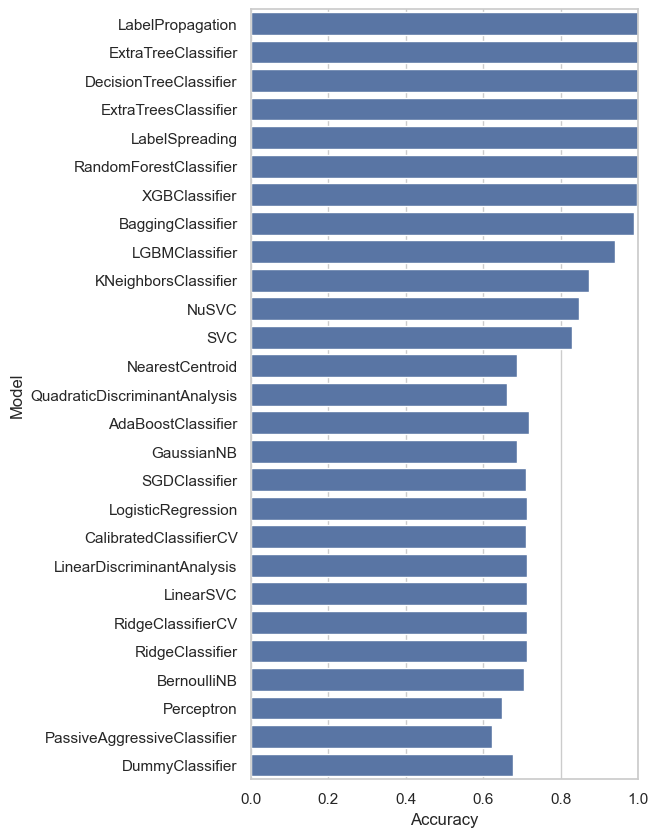

In [9]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

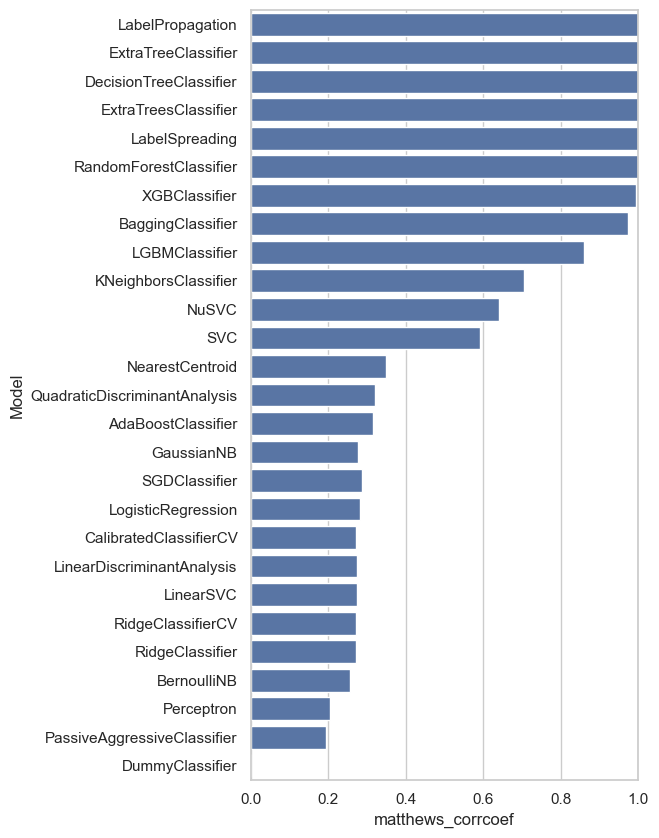

In [10]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

# Modelo SVC

Un clasificador de vectores de soporte es un tipo de modelo de aprendizaje automático que se puede utilizar para tareas de clasificación. Dado un conjunto de ejemplos de entrenamiento, cada uno etiquetado como perteneciente a una de dos clases, el objetivo del clasificador de vectores de soporte es encontrar un límite de decisión que separe al máximo las dos clases.
Matemáticamente, podemos representar el límite de decisión como una función lineal de la forma



 donde w es un vector de pesos, x es un vector de características y b es un término de sesgo. El límite de decisión es el conjunto de puntos que satisfacen esta ecuación. Para encontrar el límite de decisión que separa al máximo las dos clases, podemos resolver el siguiente problema de optimización:

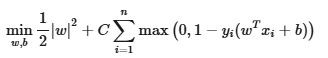

donde C es un parámetro de regularización que controla el equilibrio entre maximizar el margen y minimizar el error, i es la etiqueta del i-ésimo ejemplo de entrenamiento (ya sea 1 o -1) y x i es el vector de características correspondiente. Este problema de optimización se puede resolver mediante programación cuadrática.

La máquina de vectores de soporte es una representación de los datos de entrenamiento como puntos en el espacio separados en categorías por un espacio claro que es lo más amplio posible. Luego, los nuevos ejemplos se asignan a ese mismo espacio y se predice que pertenecen a una categoría según el lado del espacio en el que se encuentran.[1]

In [11]:


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid',],
              'random_state': [4]}  

svc_grid = grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

 


In [24]:
svc_grid.fit(X_train, y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, random_state=4;, score=0.675 total time=   1.7s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, random_state=4;, score=0.676 total time=   1.5s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, random_state=4;, score=0.675 total time=   1.5s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, random_state=4;, score=0.675 total time=   1.5s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, random_state=4;, score=0.675 total time=   1.5s
[CV 1/5] END C=0.1, gamma=1, kernel=sigmoid, random_state=4;, score=0.608 total time=   0.5s
[CV 2/5] END C=0.1, gamma=1, kernel=sigmoid, random_state=4;, score=0.605 total time=   0.5s
[CV 3/5] END C=0.1, gamma=1, kernel=sigmoid, random_state=4;, score=0.604 total time=   0.7s
[CV 4/5] END C=0.1, gamma=1, kernel=sigmoid, random_state=4;, score=0.601 total time=   0.5s
[CV 5/5] END C=0.1, gamma=1, kernel=sigmoid, random_state=4;, score=0.628 total time=   0.5s
[CV 1/5] END C=0.1, gamma=0.

In [25]:
y_val_pred_svc = grid.predict(X_val)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 4}
SVC(C=10, gamma=0.01, random_state=4)


In [28]:
print(' Val Report \n')
print(classification_report(y_val, y_val_pred_svc, target_names=['positive','negative']))

 Val Report 

              precision    recall  f1-score   support

    positive       0.91      0.96      0.94       875
    negative       0.92      0.81      0.86       420

    accuracy                           0.91      1295
   macro avg       0.91      0.89      0.90      1295
weighted avg       0.91      0.91      0.91      1295



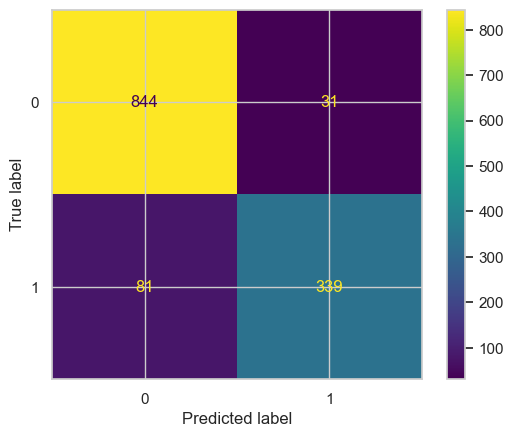

In [29]:
cm_svc = confusion_matrix(y_val, y_val_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.show()

In [30]:
with open("../models/svc_model.pkl", "wb") as f:
    pickle.dump(svc_grid.best_estimator_, f)
print("SVC Model saved")

SVC Model saved


# Modelo 2

# Modelo 3

# Conclusiones

# Referencias

1. Support Vector classifier. (n.d.). https://apmonitor.com/pds/index.php/Main/SupportVectorClassifier